In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #To supress warnings
sns.set(style="whitegrid")#set the background for the graphs

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [3]:
dffitness = data.copy()

In [4]:
dffitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
dffitness.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [6]:
# get the size of dataframe
dffitness.shape

(180, 9)

In [7]:
# get the type of dataframes
dffitness.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# data processing

In [9]:
# changing it to object datatype to category to save memory
dffitness.Product=dffitness['Product'].astype('category')
dffitness.Gender=dffitness['Gender'].astype('category')
dffitness.MaritalStatus=dffitness['MaritalStatus'].astype('category')

In [10]:
dffitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [11]:
# what are the different column name
dffitness.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [12]:
# are there any missing value
dffitness.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [13]:
# are there any duplicate values
dffitness.duplicated().sum()

0

In [14]:
# observation there are no duplicate value and missing value


# Examin Data

In [15]:
# this is look at what are unique value have
list_cols = dffitness.columns

In [16]:
for col in list_cols:
    print(f'{col},{dffitness[col].unique()}')

Product,['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']
Age,[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Gender,['Male', 'Female']
Categories (2, object): ['Male', 'Female']
Education,[14 15 12 13 16 18 20 21]
MaritalStatus,['Single', 'Partnered']
Categories (2, object): ['Single', 'Partnered']
Usage,[3 2 4 5 6 7]
Fitness,[4 3 2 1 5]
Income,[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Miles,[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 1

In [17]:
# observation
# There are three different treadmills products
# There are both partener and single customer
# Age of customer ranges from 18 to 50
# Education in year from 12-21
# Usase is form 2 days of 7days week
# fitness level of xutomer 1 to 5

In [18]:
dffitness.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [19]:
# . age of customer using treadmill is between range 18 to 50. Average age = 28 and min age = 18
# . maximunm income of treadmill user is 100k, average of income approx. 54k,while median approx.51k
# . Expected treadmill usase atleast Once a week, maximum is 7 times in a week and on average 3 times week
# . Cutomer education between 12 to 21 years with average and median 16 years and maximum of 21 years 
# . customer expect to the run on an average 103.19 miles per week 
# . Average self fitness 3

In [20]:
# which is most sold model
dffitness.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [21]:
# Are male customer buying treadmills more than female customers
dffitness.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [22]:
# Are married customer buying treadmill more than singal customer
dffitness.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [23]:
dffitness[dffitness['Product']=='TM195'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [24]:
dffitness[dffitness['Product']=='TM498'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [25]:

dffitness[dffitness['Product']=='TM798'].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


# Lets visualization DATA and get more insights

In [26]:
def dist_box_violin(data):
#     the functions plot a combination graph for univarint analysis for continuos variable
# to the spread, central tendancy, dispersion and outliners
    Name=data.name.upper()
    fig,axes=plt.subplots(1,3,figsize=(17,7))
    fig.suptitle('SPREAD OF DATA FOR'+ Name,fontsize=18,fontweight='bold')
    sns.distplot(data,kde=False,color='b',ax=axes[0])
    axes[0].axvline(data.mean(),color='y',linestyle='--',linewidth=2)
    axes[0].axvline(data.median(),color='r',linestyle='dashed',linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True,orient='h',color='purple',ax=axes[1])
    sns.violinplot(data,ax=axes[2],showmeans=True)

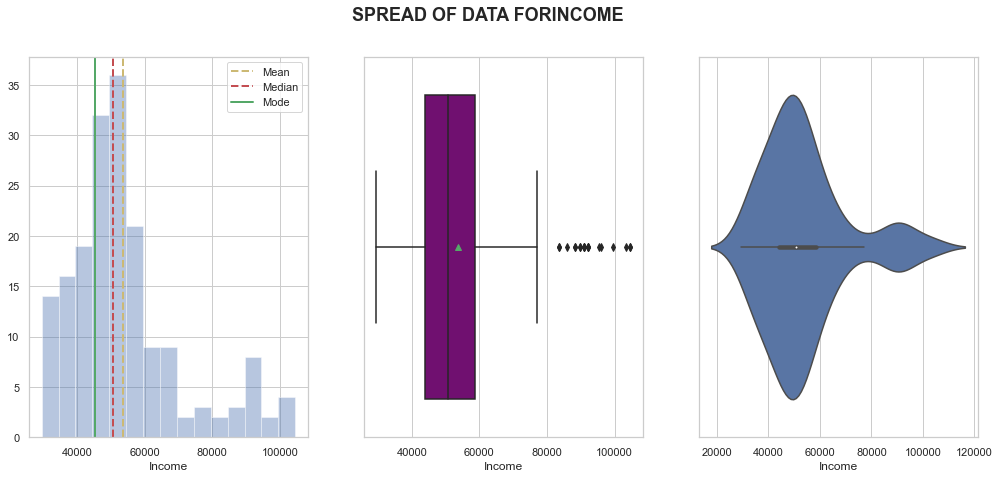

In [27]:
dist_box_violin(dffitness.Income)

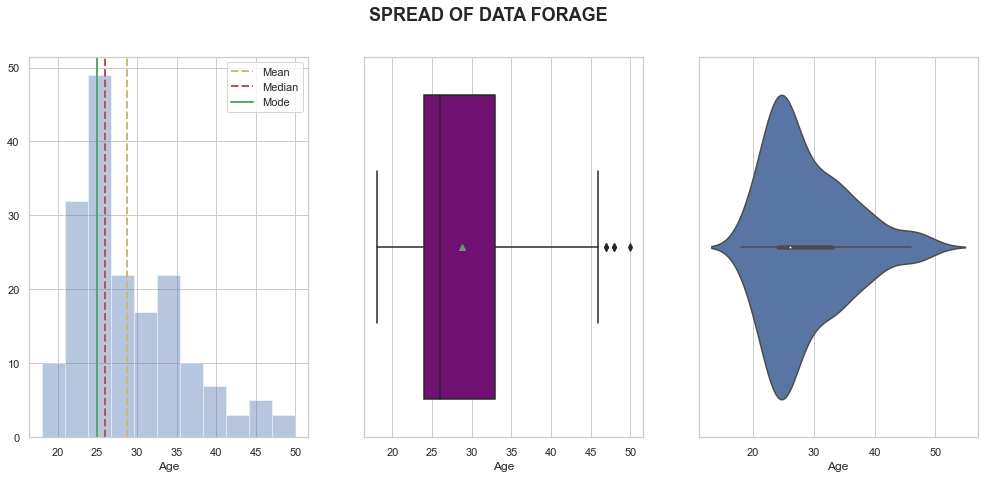

In [28]:
dist_box_violin(dffitness.Age)

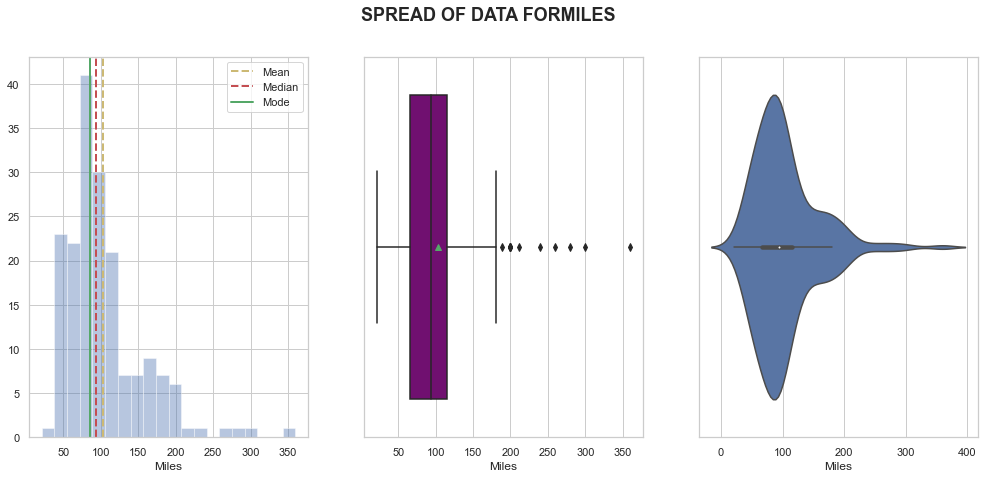

In [29]:
dist_box_violin(dffitness.Miles)

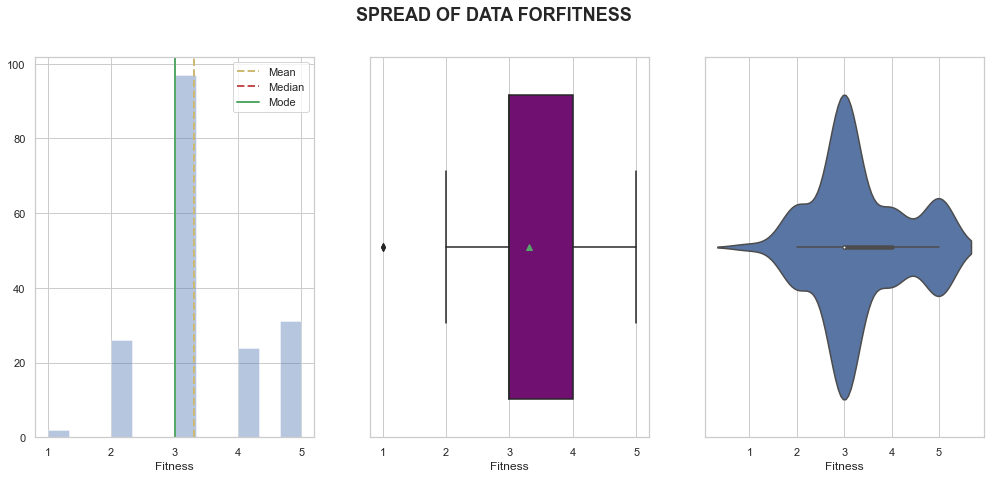

In [30]:
dist_box_violin(dffitness.Fitness)

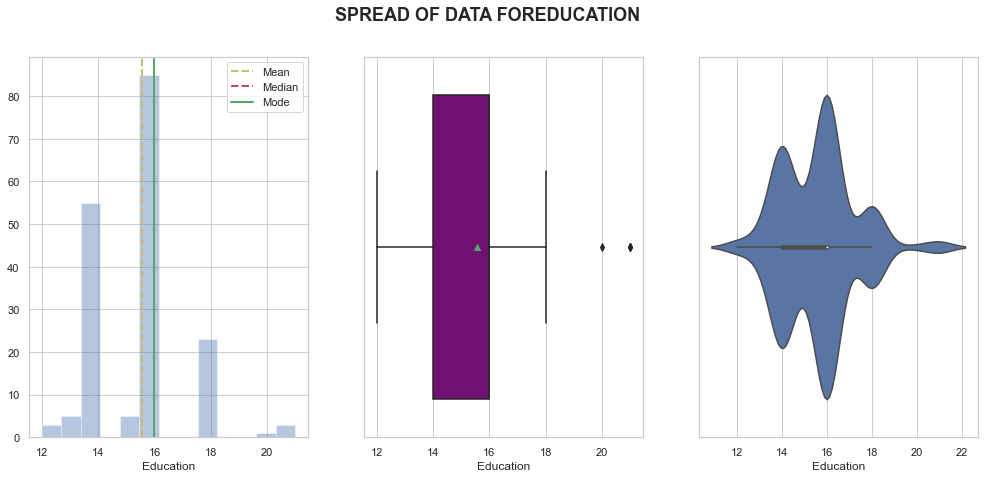

In [31]:
dist_box_violin(dffitness.Education)

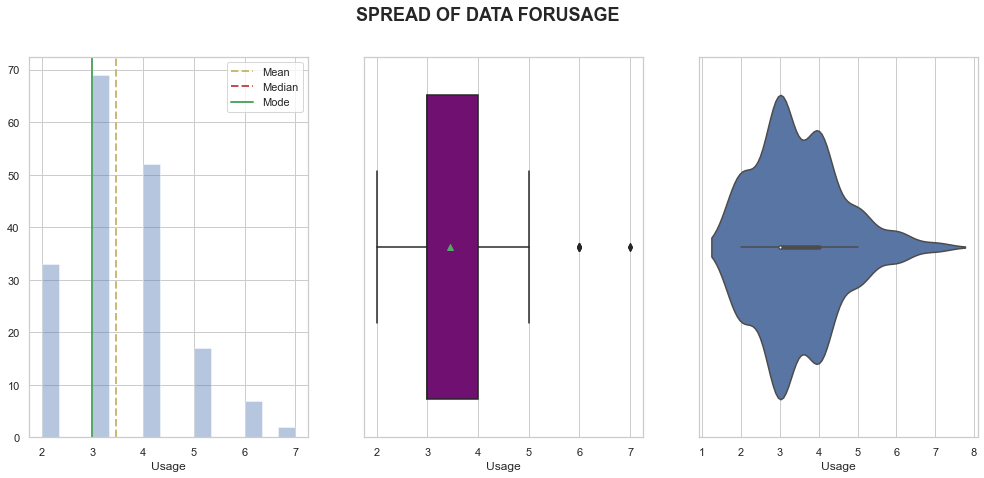

In [32]:
dist_box_violin(dffitness.Usage)

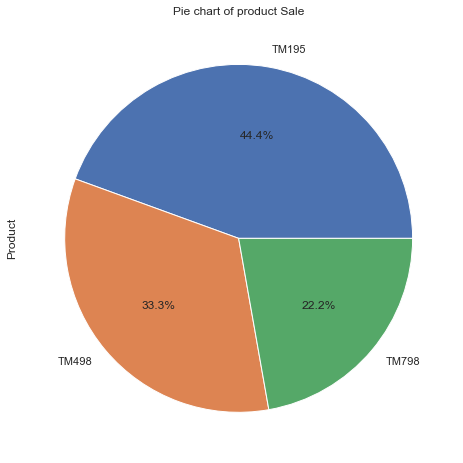

In [33]:
# univariate analysis categorical varable
plt.figure(figsize=(14,7))
dffitness['Product'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title('Pie chart of product Sale')
plt.show()

In [34]:
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

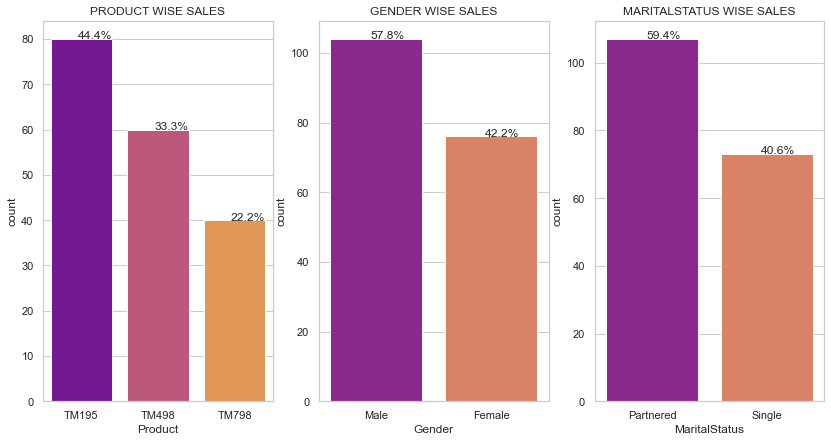

In [35]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['Product','Gender','MaritalStatus']
j=0
for i in range(len(list_col)):
    order = dffitness[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=dffitness , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() + ' WISE SALES')
    bar_perc(axes1[i],dffitness[list_col[i]])

# Biveriate analysis

In [36]:
dffitness.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

In [37]:
dffitness.groupby('Product')['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

In [38]:
dffitness.groupby('Product')['Income'].mean()

Product
TM195    46418.025
TM498    48973.650
TM798    75441.575
Name: Income, dtype: float64

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33


<Figure size 720x720 with 0 Axes>

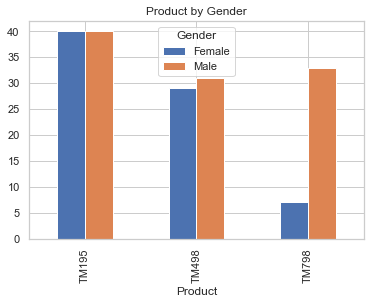

In [40]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(dffitness['Product'],dffitness['Gender'])
print(prd_gender)
ax=prd_gender.plot(kind='bar')
plt.title('Product by Gender')
plt.show()

MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


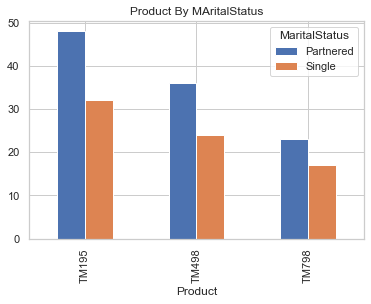

In [42]:
prd_mar_status=pd.crosstab(dffitness['Product'],dffitness['MaritalStatus'])
print(prd_mar_status)
prd_mar_status.plot(kind='bar')
plt.title('Product By MAritalStatus')
plt.show()


<AxesSubplot:>

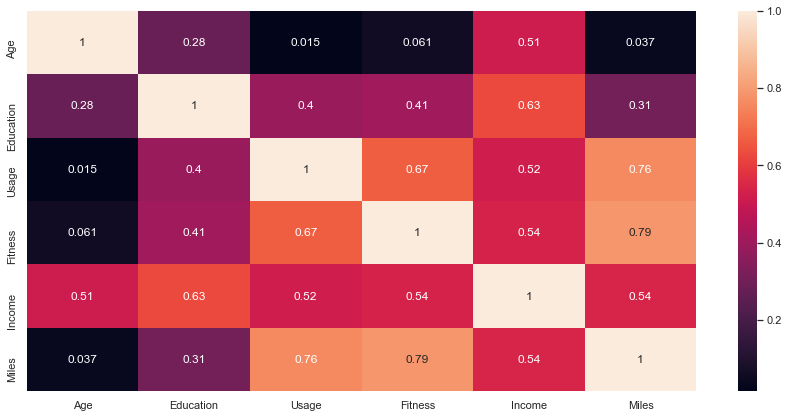

In [46]:
plt.figure(figsize=(15,7))
sns.heatmap(dffitness.corr(),annot=True)

In [47]:
corr_pairs = dffitness.corr().unstack()
print(corr_pairs[abs(corr_pairs)>0.5])


Age        Age          1.000000
           Income       0.513414
Education  Education    1.000000
           Income       0.625827
Usage      Usage        1.000000
           Fitness      0.668606
           Income       0.519537
           Miles        0.759130
Fitness    Usage        0.668606
           Fitness      1.000000
           Income       0.535005
           Miles        0.785702
Income     Age          0.513414
           Education    0.625827
           Usage        0.519537
           Fitness      0.535005
           Income       1.000000
           Miles        0.543473
Miles      Usage        0.759130
           Fitness      0.785702
           Income       0.543473
           Miles        1.000000
dtype: float64


<Figure size 1080x504 with 0 Axes>

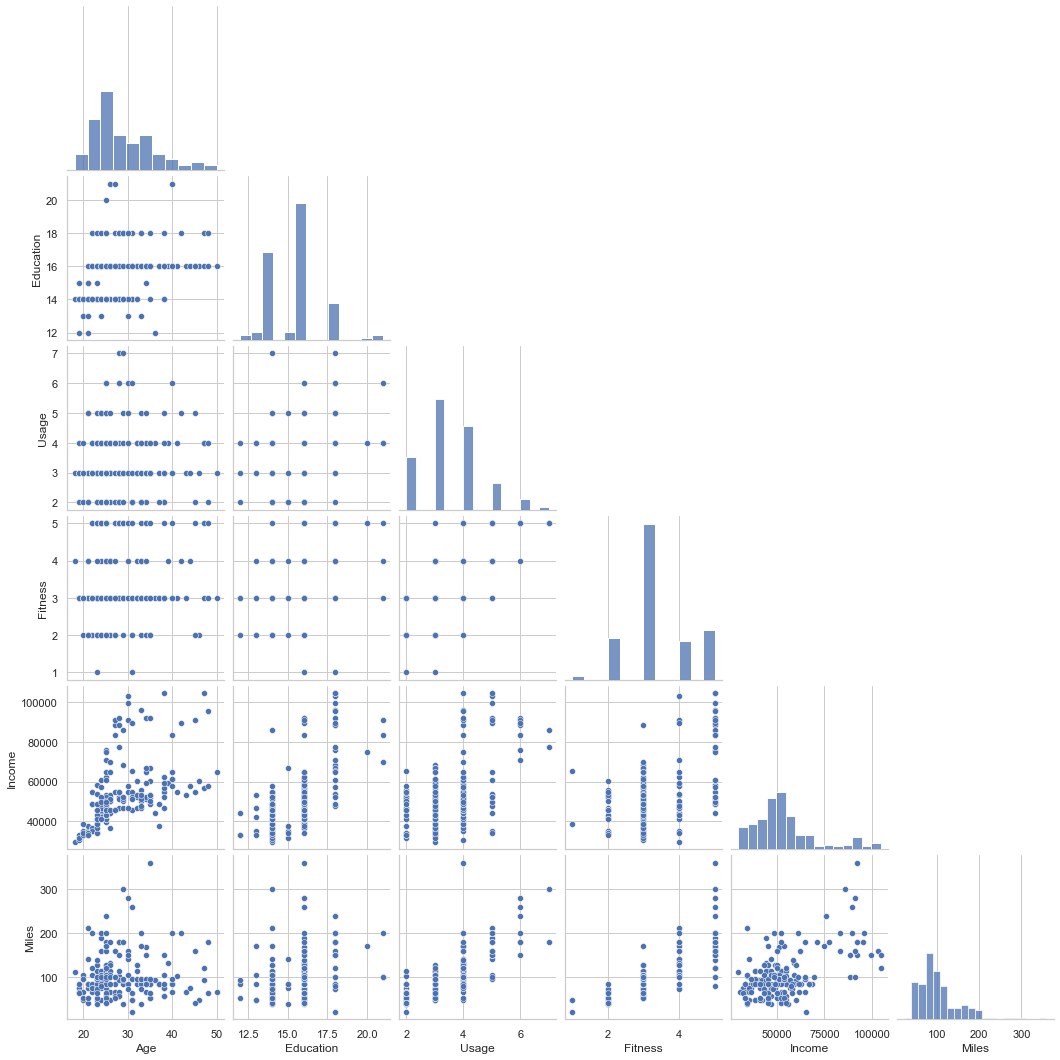

In [48]:
plt.figure(figsize=(15,7))
sns.pairplot(data=dffitness,corner=True)


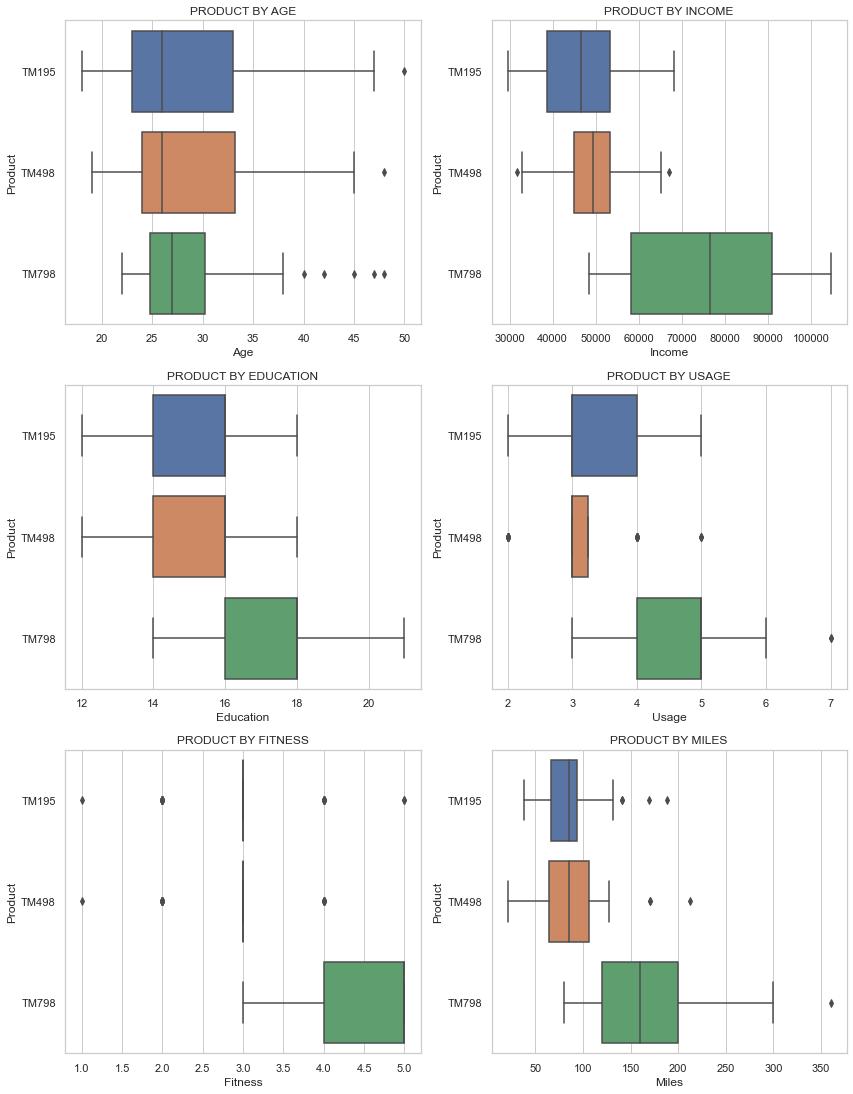

In [50]:

# Bivariate Analysis For
# Product and Age
# product and Income
# Prodcut and Education
# Product and Usage
# product and fitness
# product and Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
#instead of writing  boxplot 6 times using for loop
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    
    sns.boxplot(dffitness[list1_col[i]],dffitness['Product'],ax=ax).set(title='PRODUCT BY ' + list1_col[i].upper()  )

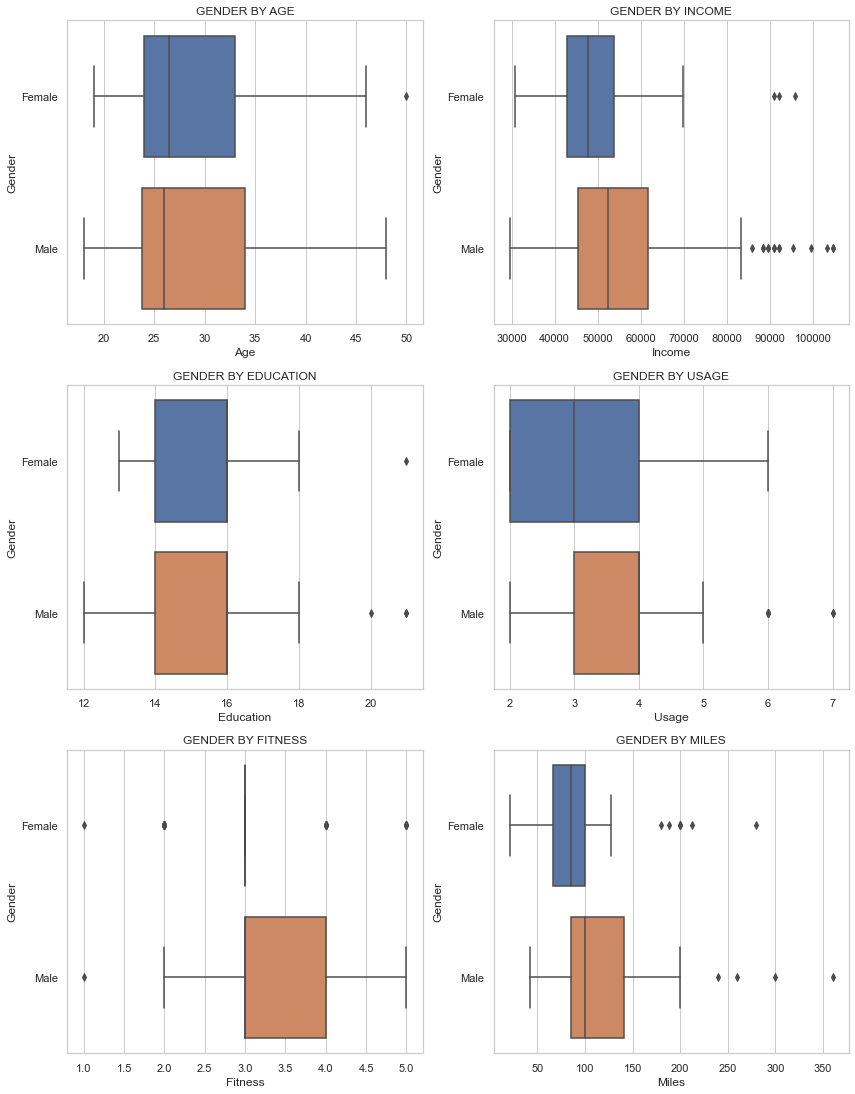

In [59]:
# Bivariate analysis for
# Gender and Age
# Gender and Income 
# Gender and Education
# Gender and Usage
# Gender and Fitness
# Gender and Miles
fig1, axes1 =plt.subplots(3,2,figsize=(14, 19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axes1[row,col]
    sns.boxplot(dffitness[list1_col[i]],dffitness['Gender'],ax=ax).set(title='GENDER BY ' + list1_col[i].upper()) 

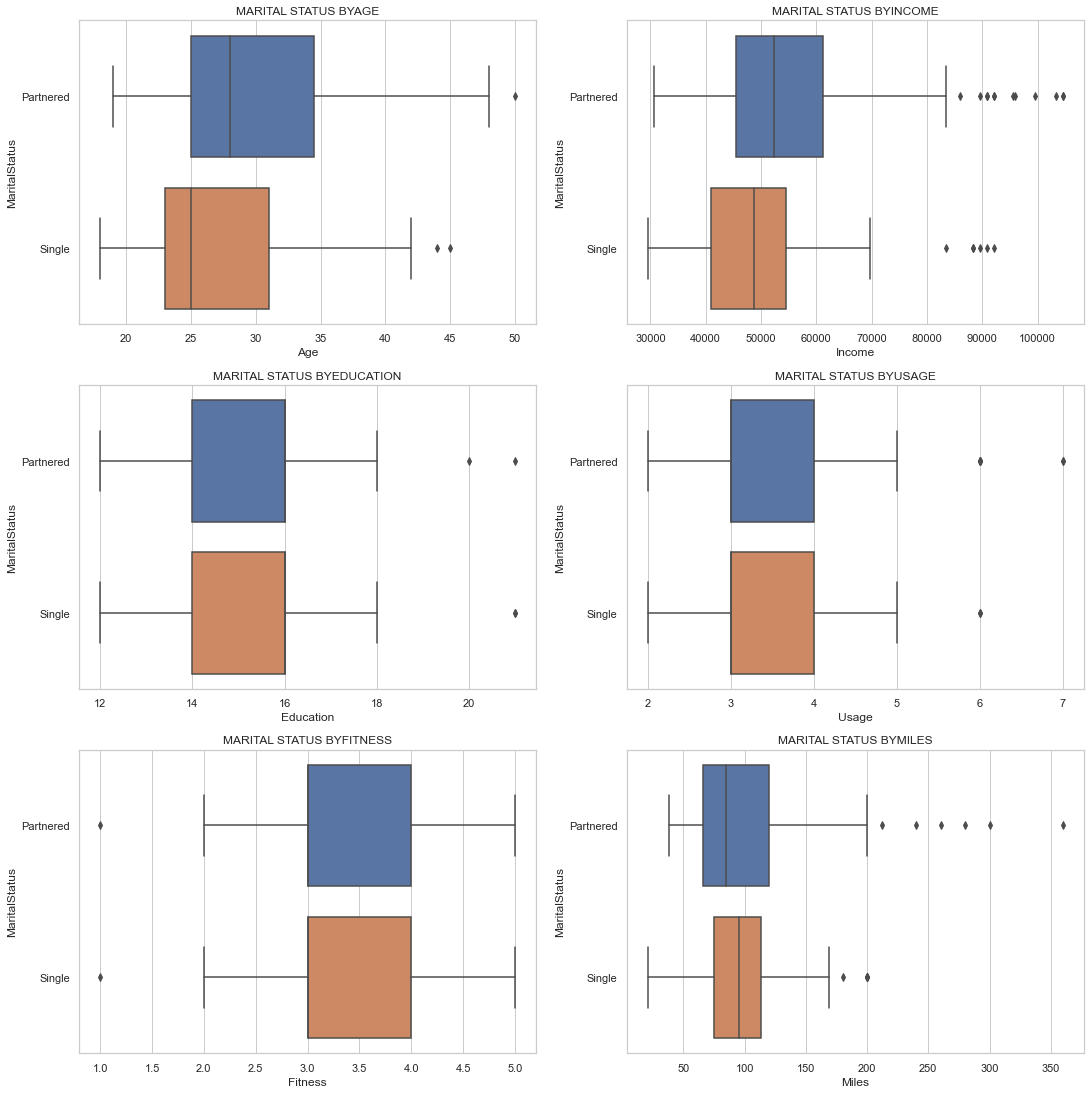

In [74]:
# Bivariate Analysis for
# Marital status and Age
# Marital status and Income
# Marital status and Education
# Marital status and Usage
# Marital status and Fitness
# Marital status ans Miles
fig1, axis1=plt.subplots(3,2,figsize=(18,19))
list1_col=['Age','Income','Education','Usage','Fitness','Miles']
for i in range(len(list1_col)):
    row=i//2
    col=i%2
    ax=axis1[row,col]
    sns.boxplot(dffitness[list1_col[i]],dffitness['MaritalStatus'],ax=ax).set(title='MARITAL STATUS BY'+ list1_col[i].upper())
    

[Text(0.5, 1.0, 'MArital Status By Gender')]

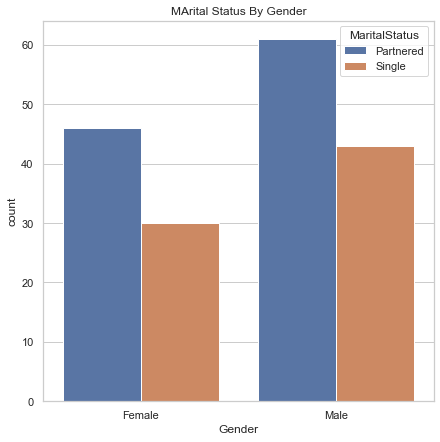

In [75]:
plt.figure(figsize=(7,7))
sns.countplot(dffitness['Gender'],hue=dffitness['MaritalStatus']).set(title='MArital Status By Gender')


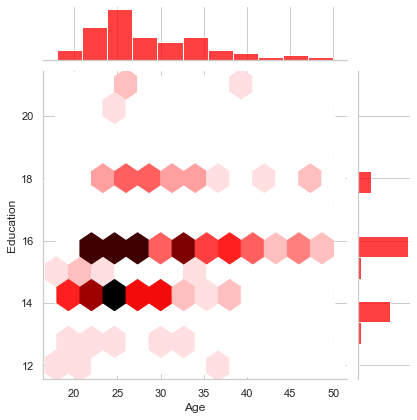

In [76]:
# Bivarient Analysis Age And Eduction
sns.jointplot(x='Age',y='Education',data=dffitness,color='red',kind='hex')
plt.show()


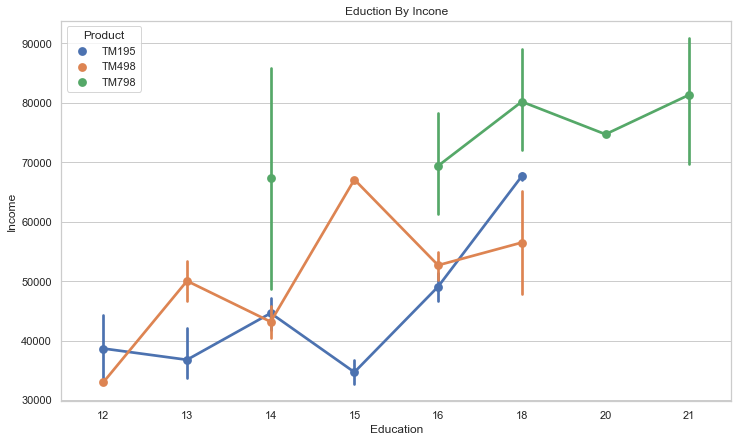

In [77]:
plt.figure(figsize=(12,7))
sns.pointplot(x='Education',y='Income',data=dffitness,hue='Product').set(title='Eduction By Incone')
plt.show()

# Multivarient Analysis

<Figure size 864x504 with 0 Axes>

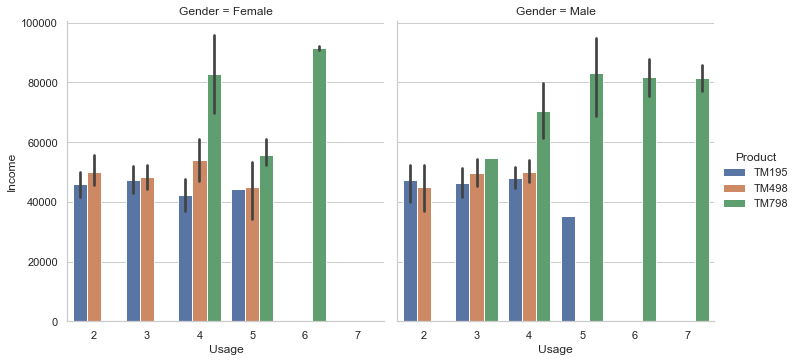

In [78]:
plt.figure(figsize=(12,7))
sns.catplot(x='Usage',y='Income',col='Gender',hue='Product',kind='bar',data=dffitness)
plt.show()

In [80]:
prd_mar_gen=pd.crosstab(index=dffitness['Product'],columns=[dffitness['MaritalStatus'],dffitness['Gender']])
prd_mar_gen

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

MaritalStatus Partnered      Single     
Gender           Female Male Female Male
Product                                 
TM195                27   21     13   19
TM498                15   21     14   10
TM798                 4   19      3   14

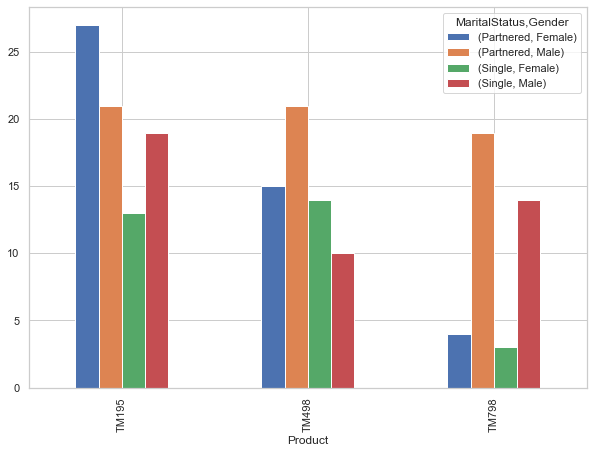

In [83]:
prd_mar_gen.plot(kind='bar',figsize=(10,7))
prd_mar_gen

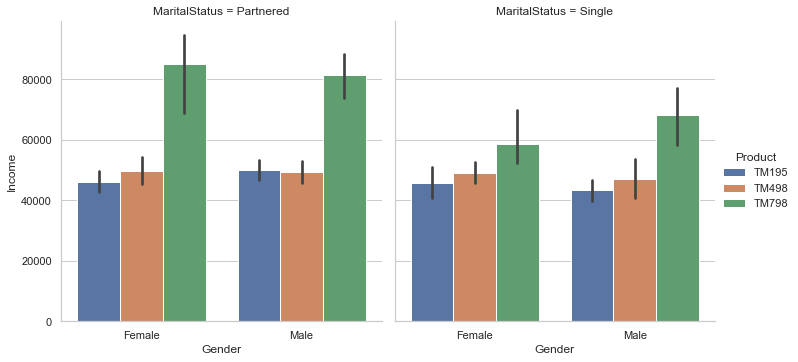

In [84]:
# income by gender by product and any marital status
sns.catplot(x='Gender',y='Income',hue='Product',col='MaritalStatus',data=dffitness,kind='bar')
plt.show()

In [86]:
prd_gen_fit=pd.crosstab(index=dffitness['Product'],columns=[dffitness['Gender'],dffitness['Fitness']])
prd_gen_fit

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
TM195        0  10  26  3  1    1  4  28  6   1
TM498        1   6  18  4  0    0  6  21  4   0
TM798        0   0   1  1  5    0  0   3  6  24

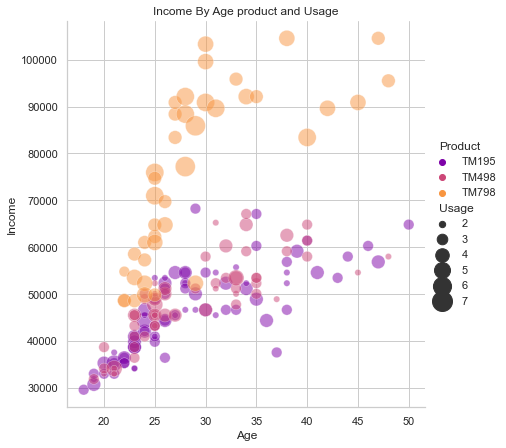

In [87]:
# scatter plot between income age and product and usage
sns.relplot(x='Age',y='Income',hue='Product',size='Usage',sizes=(40,400),alpha=.5,palette='plasma',height=6,data=data).set(title='Income By Age product and Usage')
plt.show()